<a href="https://colab.research.google.com/github/chielgroen1998/RAAM/blob/main/RAAM_(RSI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install plotly


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import time

# Define the ticker symbols for the stocks
ticker_symbols = [
    "AAPL", "MSFT", "GOOG", "AMZN", "NVDA", "META", "TSLA", "PEP", "AVGO",
    "COST", "CSCO", "ADBE", "NFLX", "TMUS", "TXN", "CMCSA", "QCOM", "INTC", "HON",
    "AMD", "AMGN", "INTU", "ISRG", "BKNG", "MDLZ", "ADI", "LRCX", "VRTX", "MU",
    "AMAT", "SBUX", "GILD", "MRNA", "ADP", "PANW", "FISV", "CSX", "REGN", "MNST",
    "KLAC", "MAR", "NXPI", "ORLY", "ADSK", "MCHP", "AEP", "KDP", "SNPS",
    "FTNT", "IDXX", "LULU", "EXC", "CTAS", "PAYX", "XEL", "PCAR", "ODFL", "VRSK",
    "WBA", "CDNS", "AZN", "DLTR", "EBAY", "BIIB", "ROST", "CRWD", "CHTR",
    "FAST", "PDD", "ANSS", "MRVL", "TEAM", "WDAY", "BKR", "DDOG", "ZS", "CEG",
    "KHC", "VRSN", "CTSH", "SWKS", "OKTA", "EA", "LCID", "BIDU", "ALGN",
    "MELI", "JD", "LI", "NTES", "ASML", "DXCM", "CPRT"
]

# Parameters - all UTC timestamps
startdate = '1999-01-01'
enddate = '2025-12-31'
cutoff_date = '2014-07-01'

mom_p = 20 #26
vol_p = 35
RSI_p = 40
ass_amount = 6
MA_p = 40
cor_p = 40 # monthly

# Create reference timestamps with timezone
START_TS = pd.Timestamp(startdate).tz_localize('UTC')
END_TS = pd.Timestamp(enddate).tz_localize('UTC')
CUTOFF_TS = pd.Timestamp(cutoff_date).tz_localize('UTC')

def download_stock_data(ticker):
    """
    Download stock data for a single ticker with improved error handling.
    """
    try:
        print(f"\nDownloading data for {ticker}...")

        # Create a Ticker object
        stock = yf.Ticker(ticker)

        # Download the historical data
        data = stock.history(
            start=startdate,
            end=enddate,
            interval='1wk',
            auto_adjust=True  # This ensures we get adjusted prices
        )

        if data.empty:
            print(f"No data available for {ticker}")
            return None

        # Extract the closing prices
        prices = data['Close']  # Use 'Close' instead of 'Adj Close' since auto_adjust=True

        # Verify we have actual price data
        if len(prices) == 0:
            print(f"No price data for {ticker}")
            return None

        print(f"{ticker}: Got {len(prices)} prices from {prices.index[0]} to {prices.index[-1]}")

        # Add a small delay to avoid rate limiting
        time.sleep(1)  # Increased delay to be more conservative

        return prices

    except Exception as e:
        print(f"Error downloading {ticker}: {str(e)}")
        return None

def main():
    print("Starting download of stock data...")

    # Download and store the data
    all_data = {}
    successful_downloads = 0
    failed_downloads = 0
    long_history_tickers = []

    # Convert cutoff date to timezone-aware pandas timestamp
    cutoff = pd.Timestamp(cutoff_date, tz='UTC')

    # First pass: Download all data and identify stocks with sufficient history
    for ticker in ticker_symbols:
        series = download_stock_data(ticker)
        if series is not None and not series.empty:
            # Ensure index is timezone aware
            if series.index.tz is None:
                series.index = series.index.tz_localize('UTC')
            # Check if the stock has data from before our cutoff date
            if series.index[0] <= CUTOFF_TS:
                long_history_tickers.append(ticker)
                all_data[ticker] = series
                successful_downloads += 1
                print(f"Successfully processed {ticker} (full history)")
            else:
                print(f"Skipping {ticker} - insufficient history (starts from {series.index[0]})")
                failed_downloads += 1
        else:
            failed_downloads += 1

    # Create DataFrame and save results
    if all_data:
        # Convert to DataFrame
        combined_data = pd.DataFrame(all_data)

        # Save to CSV
        combined_data.to_csv('combined_stock_data.csv')

        print("\nDownload Summary:")
        print(f"Successfully downloaded: {successful_downloads} stocks")
        print(f"Failed downloads: {failed_downloads} stocks")
        print(f"Stocks with complete history from 2014: {len(long_history_tickers)}")
        print(f"\nShape of combined data: {combined_data.shape}")
        print("\nDate range in data:")
        print(f"Start: {combined_data.index[0]}")
        print(f"End: {combined_data.index[-1]}")
        print(f"\nStocks in dataset: {len(combined_data.columns)}")
        print("\nFirst few rows of the data:")
        print(combined_data.head())

        # Print list of included stocks
        print("\nIncluded stocks with complete history:")
        print(', '.join(sorted(long_history_tickers)))

    else:
        print("\nNo data was successfully downloaded!")
        print(f"Attempted downloads: {len(ticker_symbols)}")
        print(f"Failed downloads: {failed_downloads}")

if __name__ == "__main__":
    main()

Starting download of stock data...

AAPL: Got 1388 prices from 1999-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed AAPL (full history)

MSFT: Got 1388 prices from 1999-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed MSFT (full history)

GOOG: Got 1095 prices from 2004-08-16 00:00:00-04:00 to 2025-08-04 00:00:00-04:00
Successfully processed GOOG (full history)

AMZN: Got 1388 prices from 1999-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed AMZN (full history)

NVDA: Got 1386 prices from 1999-01-18 00:00:00-05:00 to 2025-08-04 00:00:00-04:00
Successfully processed NVDA (full history)

META: Got 691 prices from 2012-05-14 00:00:00-04:00 to 2025-08-04 00:00:00-04:00
Successfully processed META (full history)

TSLA: Got 789 prices from 2010-06-28 00:00:00-04:00 to 2025-08-04 00:00:00-04:00
Successfully processed TSLA (full history)

PEP: Got 1388 prices from 1999-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Suc

ERROR:yfinance:$FISV: possibly delisted; no timezone found


No data available for FISV

CSX: Got 1388 prices from 1999-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed CSX (full history)

REGN: Got 1388 prices from 1999-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed REGN (full history)

MNST: Got 1388 prices from 1999-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed MNST (full history)

KLAC: Got 1388 prices from 1999-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed KLAC (full history)

MAR: Got 1388 prices from 1999-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed MAR (full history)

NXPI: Got 784 prices from 2010-08-02 00:00:00-04:00 to 2025-08-04 00:00:00-04:00
Successfully processed NXPI (full history)

ORLY: Got 1388 prices from 1999-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully processed ORLY (full history)

ADSK: Got 1388 prices from 1999-01-01 00:00:00-05:00 to 2025-08-01 00:00:00-04:00
Successfully 

In [3]:
def load_stock_data(filepath='combined_stock_data.csv'):
    combined_data = pd.read_csv(filepath, index_col=0, parse_dates=True)
    combined_data.index = pd.to_datetime(combined_data.index, utc=True)
    return combined_data

combined_data = load_stock_data()

In [4]:
price_changes = combined_data.pct_change()
volatility = price_changes.rolling(window= vol_p ).std()
volatility_monthly = volatility.resample('M').last()
ranked_volatility = volatility_monthly.rank(axis=1, method='first')

ranked_volatility

/tmp/ipython-input-302948307.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price_changes = combined_data.pct_change()
/tmp/ipython-input-302948307.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  volatility_monthly = volatility.resample('M').last()


,AAPL,MSFT,GOOG,AMZN,NVDA,META,TSLA,PEP,AVGO,COST,...,SWKS,EA,BIDU,ALGN,MELI,JD,NTES,ASML,DXCM,CPRT
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-05-31 00:00:00+00:00,40.0,11.0,NaN,54.0,17.0,NaN,NaN,1.0,NaN,13.0,...,57.0,22.0,NaN,NaN,NaN,NaN,NaN,38.0,NaN,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30 00:00:00+00:00,46.0,30.0,37.0,41.0,76.0,67.0,73.0,10.0,77.0,32.0,...,74.0,55.0,65.0,43.0,56.0,63.0,26.0,38.0,72.0,5.0
2025-05-31 00:00:00+00:00,53.0,22.0,51.0,37.0,77.0,63.0,75.0,6.0,78.0,29.0,...,74.0,27.0,59.0,50.0,55.0,24.0,43.0,45.0,70.0,34.0
2025-06-30 00:00:00+00:00,57.0,23.0,50.0,34.0,77.0,68.0,78.0,9.0,79.0,28.0,...,61.0,15.0,52.0,51.0,53.0,29.0,49.0,41.0,74.0,36.0


In [5]:
price_changes = combined_data.pct_change()

mask1 = combined_data < combined_data.shift(mom_p)

moving_average = combined_data.rolling(window=MA_p).mean()
mask2 = combined_data < moving_average

price_changes = price_changes.where(~(mask1 | mask2))

momentum = price_changes.rolling(window=mom_p).apply(lambda x: (x + 1).prod() - 1)

momentum_monthly = momentum.resample('M').last()

ranked_momentum = momentum_monthly.rank(axis=1, method='first', ascending=False)

ranked_momentum.to_csv('ranked_momentum.csv')

ranked_momentum

/tmp/ipython-input-3057405011.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price_changes = combined_data.pct_change()
/tmp/ipython-input-3057405011.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  momentum_monthly = momentum.resample('M').last()


,AAPL,MSFT,GOOG,AMZN,NVDA,META,TSLA,PEP,AVGO,COST,...,SWKS,EA,BIDU,ALGN,MELI,JD,NTES,ASML,DXCM,CPRT
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-31 00:00:00+00:00,NaN,14.0,NaN,NaN,25.0,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,4.0
1999-04-30 00:00:00+00:00,NaN,20.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,16.0
1999-05-31 00:00:00+00:00,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-30 00:00:00+00:00,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,3.0,NaN,NaN,NaN


In [6]:
pct_change_df = combined_data.pct_change()

correlation_means = []

for index, row in pct_change_df.iterrows():
    other_tickers = [ticker for ticker in pct_change_df.columns if ticker != index]
    correlation_mean = row.corr(pct_change_df[other_tickers].mean(axis=1))
    correlation_means.append(correlation_mean)

pct_change_df['Correlation_Mean'] = correlation_means
pct_change_df = pct_change_df.drop('Correlation_Mean', axis=1)

resampled_df = pct_change_df.resample('M').mean()
rolling_mean_df = resampled_df.rolling(window=cor_p).mean()
rolling_mean_df = rolling_mean_df.shift(-1)
rolling_mean_df = rolling_mean_df.iloc[:-1]

rankings_df = rolling_mean_df

ranked_correlation = rolling_mean_df.rank(axis=1, method='first')

ranked_correlation


/tmp/ipython-input-2708876130.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pct_change_df = combined_data.pct_change()
/tmp/ipython-input-2708876130.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = pct_change_df.resample('M').mean()


,AAPL,MSFT,GOOG,AMZN,NVDA,META,TSLA,PEP,AVGO,COST,...,SWKS,EA,BIDU,ALGN,MELI,JD,NTES,ASML,DXCM,CPRT
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-05-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-31 00:00:00+00:00,47.0,59.0,43.0,57.0,81.0,75.0,55.0,11.0,80.0,68.0,...,4.0,36.0,13.0,2.0,77.0,14.0,51.0,30.0,25.0,66.0
2025-04-30 00:00:00+00:00,29.0,55.0,39.0,61.0,81.0,77.0,65.0,8.0,80.0,67.0,...,5.0,22.0,6.0,2.0,78.0,7.0,48.0,42.0,38.0,51.0
2025-05-31 00:00:00+00:00,35.0,56.0,40.0,51.0,81.0,78.0,61.0,10.0,80.0,62.0,...,5.0,28.0,7.0,2.0,77.0,8.0,63.0,42.0,26.0,49.0


In [7]:
combined_data.index = pd.to_datetime(combined_data.index)

rsi_values = pd.DataFrame(index=combined_data.index)

for stock in combined_data.columns:
    stock_changes = combined_data[stock].pct_change()

    gain = stock_changes.clip(lower=0)
    loss = -stock_changes.clip(upper=0)

    avg_gain = gain.ewm(com=RSI_p, adjust=False).mean()
    avg_loss = loss.ewm(com=RSI_p, adjust=False).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    rsi_values[stock] = rsi

rsi_monthly = rsi_values.resample('M').last()

ranked_rsi = rsi_monthly.rank(axis=1, method='first', ascending=False)

# Print the ranked RSI
ranked_rsi

/tmp/ipython-input-1309934334.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_changes = combined_data[stock].pct_change()
/tmp/ipython-input-1309934334.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_changes = combined_data[stock].pct_change()
/tmp/ipython-input-1309934334.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_changes = combined_data[stock].pct_change()
/tmp/ip

,AAPL,MSFT,GOOG,AMZN,NVDA,META,TSLA,PEP,AVGO,COST,...,SWKS,EA,BIDU,ALGN,MELI,JD,NTES,ASML,DXCM,CPRT
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-31 00:00:00+00:00,49.0,25.0,NaN,39.0,55.0,NaN,NaN,42.0,NaN,23.0,...,45.0,52.0,NaN,NaN,NaN,NaN,NaN,41.0,NaN,19.0
1999-02-28 00:00:00+00:00,45.0,30.0,NaN,33.0,12.0,NaN,NaN,48.0,NaN,22.0,...,54.0,57.0,NaN,NaN,NaN,NaN,NaN,46.0,NaN,20.0
1999-03-31 00:00:00+00:00,44.0,27.0,NaN,30.0,17.0,NaN,NaN,47.0,NaN,26.0,...,45.0,49.0,NaN,NaN,NaN,NaN,NaN,40.0,NaN,21.0
1999-04-30 00:00:00+00:00,39.0,42.0,NaN,38.0,20.0,NaN,NaN,57.0,NaN,34.0,...,22.0,56.0,NaN,NaN,NaN,NaN,NaN,48.0,NaN,24.0
1999-05-31 00:00:00+00:00,32.0,47.0,NaN,48.0,23.0,NaN,NaN,58.0,NaN,35.0,...,21.0,53.0,NaN,NaN,NaN,NaN,NaN,45.0,NaN,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30 00:00:00+00:00,51.0,31.0,50.0,52.0,40.0,32.0,37.0,79.0,22.0,13.0,...,68.0,34.0,45.0,69.0,9.0,44.0,7.0,64.0,36.0,18.0
2025-05-31 00:00:00+00:00,72.0,18.0,51.0,39.0,28.0,25.0,21.0,80.0,14.0,20.0,...,62.0,43.0,71.0,73.0,9.0,68.0,7.0,52.0,37.0,78.0
2025-06-30 00:00:00+00:00,66.0,7.0,49.0,29.0,16.0,20.0,52.0,78.0,6.0,45.0,...,51.0,37.0,72.0,67.0,21.0,74.0,3.0,46.0,62.0,80.0


In [8]:
ranking_weights = pd.Series({
    'Momentum Score': 0,
    'RSI Score': 1,
    'Volatility Score': 0,
    'Correlation Score': 0
})

weighted_momentum = ranked_momentum * ranking_weights['Momentum Score']
weighted_rsi = ranked_rsi * ranking_weights['RSI Score']
weighted_volatility = ranked_volatility * ranking_weights['Volatility Score']
weighted_correlation = ranked_correlation * ranking_weights['Correlation Score']

cumulative_score = weighted_momentum + weighted_rsi + weighted_volatility + weighted_correlation

cumulative_score.to_csv('cumscore.csv', index=True)

cumulative_score

,AAPL,MSFT,GOOG,AMZN,NVDA,META,TSLA,PEP,AVGO,COST,...,SWKS,EA,BIDU,ALGN,MELI,JD,NTES,ASML,DXCM,CPRT
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-05-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-30 00:00:00+00:00,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21.0,NaN,3.0,NaN,NaN,NaN


In [9]:
import pandas as pd

def process_portfolio_selections(cumulative_score, ass_amount):
    ranked_df = cumulative_score.apply(lambda x: x.nsmallest(ass_amount), axis=1)

    ranked_mask = ranked_df.notna()

    result_df = pd.DataFrame(index=ranked_df.index, columns=ranked_df.columns)
    for column in ranked_df.columns:
        result_df[column] = ranked_mask[column].map({True: column, False: 0})
    result_df.index = pd.to_datetime(result_df.index)
    result_df.index = result_df.index + pd.DateOffset(months=1)

    dates = []
    tickers = []

    for date, row in result_df.iterrows():
        valid_tickers = row[row != 0]
        if not valid_tickers.empty:
            dates.extend([date] * len(valid_tickers))
            tickers.extend(valid_tickers.index)

    non_zero_df = pd.DataFrame({
        'Date': dates,
        'Ticker': tickers
    })

    non_zero_df['Date'] = pd.to_datetime(non_zero_df['Date'])

    return non_zero_df

portfolio_selections = process_portfolio_selections(cumulative_score, ass_amount)

portfolio_selections.to_csv('portfolio_selections.csv', index=False)

print("\nPortfolio Selections Summary:")
print(f"Total number of selections: {len(portfolio_selections)}")
print(f"Date range: {portfolio_selections['Date'].min()} to {portfolio_selections['Date'].max()}")
print(f"Number of unique tickers: {portfolio_selections['Ticker'].nunique()}")
print("\nFirst few selections:")
print(portfolio_selections.head(50))
print(portfolio_selections.tail(6))


Portfolio Selections Summary:
Total number of selections: 1609
Date range: 2002-04-30 00:00:00+00:00 to 2025-08-31 00:00:00+00:00
Number of unique tickers: 81

First few selections:
                        Date Ticker
0  2002-04-30 00:00:00+00:00   AMAT
1  2002-04-30 00:00:00+00:00   FAST
2  2002-04-30 00:00:00+00:00   KLAC
3  2002-04-30 00:00:00+00:00   PCAR
4  2002-04-30 00:00:00+00:00   ROST
5  2002-04-30 00:00:00+00:00   SBUX
6  2002-05-30 00:00:00+00:00    EXC
7  2002-05-30 00:00:00+00:00   FAST
8  2002-05-30 00:00:00+00:00   ODFL
9  2002-05-30 00:00:00+00:00    PEP
10 2002-05-30 00:00:00+00:00   ROST
11 2002-05-30 00:00:00+00:00   SBUX
12 2002-06-30 00:00:00+00:00   CTSH
13 2002-06-30 00:00:00+00:00   FAST
14 2002-06-30 00:00:00+00:00   IDXX
15 2002-06-30 00:00:00+00:00   MCHP
16 2002-06-30 00:00:00+00:00   ODFL
17 2002-06-30 00:00:00+00:00   ROST
18 2002-07-30 00:00:00+00:00   AMZN
19 2002-07-30 00:00:00+00:00   CTSH
20 2002-07-30 00:00:00+00:00   DLTR
21 2002-07-30 00:00:00+00

In [10]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
from typing import Dict, List, Any


In [11]:
def calculate_stock_return(ticker: str, start_date: pd.Timestamp, end_date: pd.Timestamp) -> Dict[str, Any]:
    try:
        stock = yf.download(
            ticker,
            start=start_date,
            end=end_date + timedelta(days=1),
            progress=False,
            ignore_tz=True,
            auto_adjust=False
        )

        if stock.empty or len(stock) < 2:
            print(f"Warning: Insufficient data for {ticker} between {start_date} and {end_date}")
            return None

        first_price = float(stock['Adj Close'].iloc[0].item())
        last_price = float(stock['Adj Close'].iloc[-1].item())
        pct_change = ((last_price - first_price) / first_price) * 100

        return {
            'Start_Price': first_price,
            'End_Price': last_price,
            'Return_Pct': pct_change
        }
    except Exception as e:
        print(f"Error processing {ticker} for period {start_date} to {end_date}: {str(e)}")
        return None

def analyze_portfolio(df: pd.DataFrame) -> pd.DataFrame:
    results = []

    monthly_portfolios = df.groupby('Date')['Ticker'].apply(list).reset_index()

    total_tickers = sum(len(tickers) for tickers in monthly_portfolios['Ticker'])
    processed = 0

    for _, row in monthly_portfolios.iterrows():
        date = pd.to_datetime(row['Date'])
        tickers = row['Ticker']

        start_date = date.replace(day=1)
        end_date = (start_date + pd.offsets.MonthEnd(0))

        for ticker in tickers:
            return_data = calculate_stock_return(ticker, start_date, end_date)
            processed += 1

            if return_data is not None:
                results.append({
                    'Date': date,
                    'Ticker': ticker,
                    **return_data
                })

            if processed % 100 == 0:
                print(f"Processed {processed}/{total_tickers} stocks")

    return pd.DataFrame(results)

def format_summary(summary_df: pd.DataFrame) -> pd.DataFrame:
    summary_df.index = summary_df.index.strftime('%Y-%m-%d')
    return summary_df

def print_analysis(returns_df: pd.DataFrame, summary_df: pd.DataFrame):
    print("\nPortfolio Analysis Summary:")
    print(f"Total periods analyzed: {len(summary_df)}")
    print(f"Total stocks analyzed: {len(returns_df)}")

    print("\nFirst few rows of monthly summary:")
    print(format_summary(summary_df.head()))

    print("\nOverall Statistics:")
    print(f"Average monthly return: {returns_df['Return_Pct'].mean():.2f}%")
    print(f"Best monthly return: {returns_df['Return_Pct'].max():.2f}%")
    print(f"Worst monthly return: {returns_df['Return_Pct'].min():.2f}%")
    print(f"Return standard deviation: {returns_df['Return_Pct'].std():.2f}%")

    # Calculate annualized statistics
    monthly_returns = returns_df.groupby('Date')['Return_Pct'].mean()
    annualized_return = ((1 + monthly_returns/100).prod() ** (12/len(monthly_returns)) - 1) * 100
    annualized_vol = monthly_returns.std() * np.sqrt(12)

    print(f"\nAnnualized Statistics:")
    print(f"Annualized Return: {annualized_return:.2f}%")
    print(f"Annualized Volatility: {annualized_vol:.2f}%")
    print(f"Sharpe Ratio (Rf=0): {(annualized_return/annualized_vol):.2f}")

if __name__ == "__main__":
    portfolio_df = pd.read_csv("portfolio_selections.csv")
    print("Starting portfolio analysis...")
    returns_df = analyze_portfolio(portfolio_df)

    summary_df = returns_df.groupby('Date').agg({
        'Return_Pct': [
            ('Mean Return %', 'mean'),
            ('Std Dev %', 'std'),
            ('Min Return %', 'min'),
            ('Max Return %', 'max'),
            ('Count', 'count')
        ]
    }).round(2)

    summary_df.columns = summary_df.columns.get_level_values(1)

    returns_df.to_csv('stock_returns_detailed.csv', index=False)
    summary_df.to_csv('monthly_summary.csv')

    print_analysis(returns_df, summary_df)

Starting portfolio analysis...
Processed 100/1609 stocks
Processed 200/1609 stocks
Processed 300/1609 stocks
Processed 400/1609 stocks
Processed 500/1609 stocks


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANSS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-03-01 00:00:00+00:00 -> 2010-04-01 00:00:00+00:00)')


Processed 600/1609 stocks
Processed 700/1609 stocks
Processed 800/1609 stocks
Processed 900/1609 stocks
Processed 1000/1609 stocks
Processed 1100/1609 stocks
Processed 1200/1609 stocks
Processed 1300/1609 stocks
Processed 1400/1609 stocks
Processed 1500/1609 stocks


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GILD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-11-01 00:00:00+00:00 -> 2024-12-01 00:00:00+00:00)')


Processed 1600/1609 stocks

Portfolio Analysis Summary:
Total periods analyzed: 279
Total stocks analyzed: 1607

First few rows of monthly summary:
            Mean Return %  Std Dev %  Min Return %  Max Return %  Count
Date                                                                   
2002-04-30          -1.30      11.46        -13.94         12.65      6
2002-05-30          -0.83       3.85         -5.18          4.64      6
2002-06-30           3.01      16.35        -16.65         32.49      6
2002-07-30          -1.65      10.30        -15.81         13.08      6
2002-08-31          -0.28      11.30        -15.72          8.75      4

Overall Statistics:
Average monthly return: 2.24%
Best monthly return: 90.94%
Worst monthly return: -42.04%
Return standard deviation: 9.99%

Annualized Statistics:
Annualized Return: 26.77%
Annualized Volatility: 20.96%
Sharpe Ratio (Rf=0): 1.28


Creating performance charts...



/tmp/ipython-input-3805689027.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark_data = yf.download(ticker,
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3805689027.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark_data = yf.download(ticker,


[*********************100%***********************]  1 of 1 completed



Yearly Performance Comparison (%):
      Portfolio    SPY    QQQ
Date                         
2002      10.48 -17.05 -18.87
2003      53.08  28.21  49.61
2004      71.66  10.70   9.53
2005      31.24   4.77   2.29
2006      10.89  15.81   7.27
2007      36.26   5.17  19.05
2008     -41.36 -36.97 -41.75
2009      79.07  26.70  54.65
2010      29.69  15.07  20.11
2011      18.30   1.79   3.29
2012      21.00  15.90  17.91
2013      51.41  32.53  36.96
2014      50.10  13.45  19.12
2015      25.62   1.19   9.51
2016      44.87  12.00   7.11
2017      29.12  21.80  32.78
2018      20.30  -4.64  -0.20
2019      33.59  31.34  39.06
2020      47.41  18.41  48.46
2021      30.93  28.82  27.49
2022     -13.97 -18.26 -32.65
2023      25.28  26.24  54.84
2024      30.09  24.97  25.69
2025      -4.77   8.16  10.06

Yearly Statistics:
      Return  Volatility  Sharpe  Sortino  Max Drawdown
Date                                                   
2002  0.1048      0.2988  0.2838   0.5837       -0.1

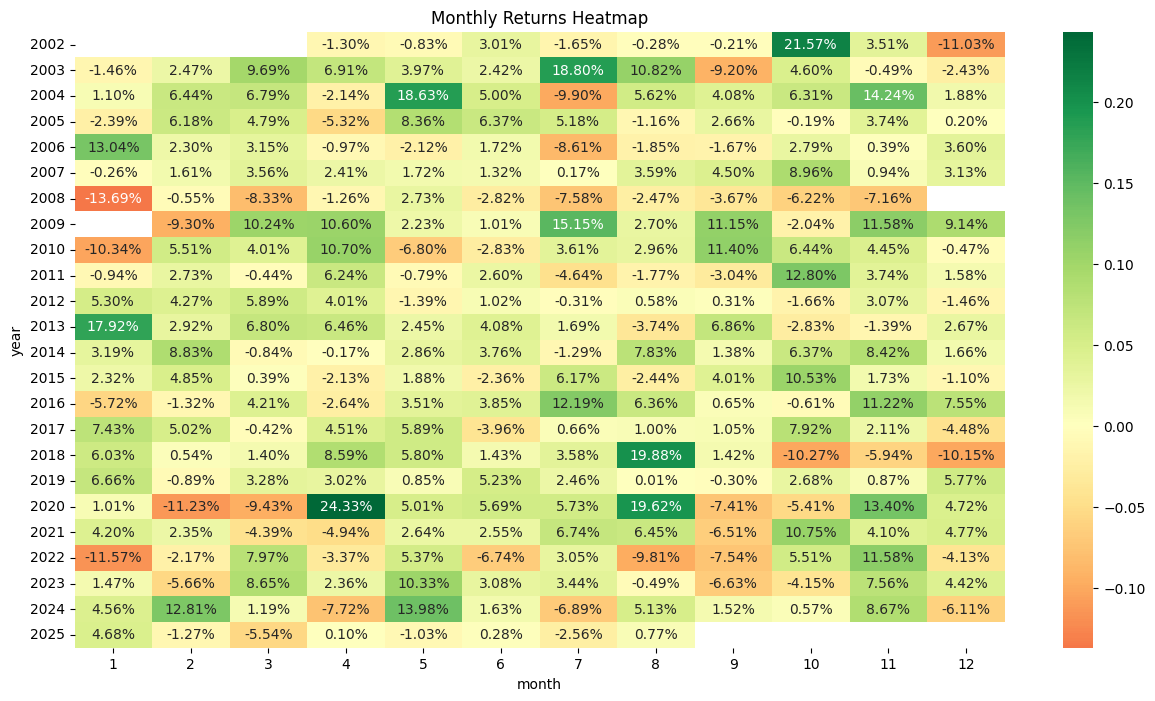


Portfolio Statistics:
Total Return: 24719.80%
Annual Return: 26.77%
Monthly Volatility: 6.05%
Annual Volatility: 20.96%
Sharpe Ratio: 1.15
Max Drawdown: -46.82%


In [12]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def calculate_monthly_matrix(returns_series):
    df = pd.DataFrame({'returns': returns_series})
    df['year'] = df.index.year
    df['month'] = df.index.month
    return df.pivot_table(index='year', columns='month', values='returns')

def create_performance_charts(returns_df, benchmark_tickers=['SPY', 'QQQ']):
    """Create performance visualization suite"""
    # Convert returns to decimal
    returns_df['Return_Pct'] = returns_df['Return_Pct'] / 100

    monthly_returns = returns_df.groupby('Date')['Return_Pct'].mean()
    portfolio_cum_returns = (1 + monthly_returns).cumprod()

    benchmark_returns = {}
    for ticker in benchmark_tickers:
        print(f"\nDownloading {ticker} data...")
        benchmark_data = yf.download(ticker,
                                   start=returns_df['Date'].min(),
                                   end=returns_df['Date'].max(),
                                   interval='1mo')
        benchmark_returns[ticker] = benchmark_data['Close'].pct_change()

    fig1 = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        subplot_titles=('Cumulative Returns (Log Scale)', 'Drawdowns'))

    fig1.add_trace(
        go.Scatter(x=portfolio_cum_returns.index, y=portfolio_cum_returns,
                  name='Portfolio', line=dict(color='blue')),
        row=1, col=1
    )

    for ticker, returns in benchmark_returns.items():
        cum_returns = (1 + returns).cumprod()
        fig1.add_trace(
            go.Scatter(x=cum_returns.index, y=cum_returns,
                      name=ticker, line=dict(dash='dash')),
            row=1, col=1
        )

    drawdowns = (portfolio_cum_returns / portfolio_cum_returns.cummax() - 1)
    fig1.add_trace(
        go.Scatter(x=drawdowns.index, y=drawdowns,
                  name='Portfolio Drawdowns', line=dict(color='red')),
        row=2, col=1
    )

    fig1.update_layout(height=800, title='Portfolio Performance Analysis')
    fig1.update_yaxes(type="log", row=1, col=1)

    monthly_matrix = calculate_monthly_matrix(monthly_returns)

    yearly_returns = monthly_returns.groupby(monthly_returns.index.year).apply(
        lambda x: (1 + x).prod() - 1
    )

    yearly_comparison = pd.DataFrame({
        'Portfolio': yearly_returns
    })

    for ticker, returns in benchmark_returns.items():
        yearly_comparison[ticker] = returns.groupby(returns.index.year).apply(
            lambda x: (1 + x).prod() - 1
        )

    fig2 = plt.figure(figsize=(15, 8))
    sns.heatmap(monthly_matrix,
                cmap='RdYlGn',
                center=0,
                annot=True,
                fmt='.2%')
    plt.title('Monthly Returns Heatmap')

    yearly_stats = pd.DataFrame(index=yearly_returns.index)

    for year in yearly_returns.index:
        year_returns = monthly_returns[monthly_returns.index.year == year]

        yearly_stats.loc[year, 'Return'] = yearly_returns[year]
        yearly_stats.loc[year, 'Volatility'] = year_returns.std() * np.sqrt(12)
        yearly_stats.loc[year, 'Sharpe'] = (yearly_returns[year] - 0.02) / (year_returns.std() * np.sqrt(12))

        downside_returns = year_returns[year_returns < 0]
        if len(downside_returns) > 0:
            yearly_stats.loc[year, 'Sortino'] = (yearly_returns[year] - 0.02) / (downside_returns.std() * np.sqrt(12))
        else:
            yearly_stats.loc[year, 'Sortino'] = np.nan

        cum_returns = (1 + year_returns).cumprod()
        yearly_stats.loc[year, 'Max Drawdown'] = (cum_returns / cum_returns.cummax() - 1).min()

    return {
        'performance_plot': fig1,
        'heatmap': fig2,
        'yearly_comparison': yearly_comparison,
        'yearly_stats': yearly_stats
    }

if __name__ == "__main__":
    # Read your data
    returns_df = pd.read_csv('stock_returns_detailed.csv')
    returns_df['Date'] = pd.to_datetime(returns_df['Date'])

    print("Creating performance charts...")
    analysis_results = create_performance_charts(returns_df)

    # Display results
    print("\nYearly Performance Comparison (%):")
    print(analysis_results['yearly_comparison'].round(4) * 100)

    print("\nYearly Statistics:")
    print(analysis_results['yearly_stats'].round(4))

    # Save results
    analysis_results['yearly_comparison'].to_csv('yearly_performance_comparison.csv')
    analysis_results['yearly_stats'].to_csv('yearly_statistics.csv')

    # Show plots
    analysis_results['performance_plot'].show()
    plt.show()  # Show the heatmap

    # Additional analytics
    monthly_returns = returns_df.groupby('Date')['Return_Pct'].mean()

    print("\nPortfolio Statistics:")
    print(f"Total Return: {(((1 + monthly_returns).prod() - 1) * 100):.2f}%")
    print(f"Annual Return: {(((1 + monthly_returns).prod() ** (12/len(monthly_returns)) - 1) * 100):.2f}%")
    print(f"Monthly Volatility: {(monthly_returns.std() * 100):.2f}%")
    print(f"Annual Volatility: {(monthly_returns.std() * np.sqrt(12) * 100):.2f}%")
    print(f"Sharpe Ratio: {((monthly_returns.mean() - 0.02/12) / (monthly_returns.std()) * np.sqrt(12)):.2f}")
    print(f"Max Drawdown: {(((1 + monthly_returns).cumprod() / (1 + monthly_returns).cumprod().cummax() - 1).min() * 100):.2f}%")

In [16]:
import plotly.express as px
import pandas as pd
import yfinance as yf # Import yfinance

if 'monthly_returns' not in locals() and 'analysis_results' in locals() and 'monthly_returns' in analysis_results:
    portfolio_monthly_returns = analysis_results['monthly_returns']
elif 'monthly_returns' in locals():
     portfolio_monthly_returns = monthly_returns
else:
    print("Error: Portfolio monthly returns not found. Please run previous cells.")
    portfolio_monthly_returns = pd.Series(dtype='float64') # Create empty series to avoid further errors

if portfolio_monthly_returns.index.tz is None:
    portfolio_monthly_returns.index = portfolio_monthly_returns.index.tz_localize('UTC')
elif portfolio_monthly_returns.index.tz != 'UTC':
    portfolio_monthly_returns.index = portfolio_monthly_returns.index.tz_convert('UTC')

benchmark_tickers = ['SPY', 'QQQ']
benchmark_monthly_returns = {}

print("Downloading benchmark data...")
for ticker in benchmark_tickers:
    try:
        # Download daily data with auto_adjust=True
        benchmark_data = yf.download(ticker,
                                   start=portfolio_monthly_returns.index.min(), # Use portfolio start date
                                   end=portfolio_monthly_returns.index.max(), # Use portfolio end date
                                   interval='1d', # Download daily data
                                   auto_adjust=True,
                                   progress=False # Suppress download progress
                                   )
        if not benchmark_data.empty:
            monthly_returns_series = benchmark_data['Close'].resample('ME').ffill().pct_change()
            if monthly_returns_series.index.tz is None:
                monthly_returns_series.index = monthly_returns_series.index.tz_localize('UTC')
            elif monthly_returns_series.index.tz != 'UTC':
                 monthly_returns_series.index = monthly_returns_series.index.tz_convert('UTC')


            benchmark_monthly_returns[ticker] = monthly_returns_series
        else:
            print(f"Warning: Could not download data for {ticker}")
            benchmark_monthly_returns[ticker] = pd.Series(dtype='float64', index=portfolio_monthly_returns.index, name=ticker).tz_localize('UTC')


    except Exception as e:
        print(f"Error downloading {ticker}: {str(e)}")
        benchmark_monthly_returns[ticker] = pd.Series(dtype='float64', index=portfolio_monthly_returns.index, name=ticker).tz_localize('UTC')

all_indices_list = [portfolio_monthly_returns.index]
for returns in benchmark_monthly_returns.values():
     if isinstance(returns.index, pd.Index):
        if returns.index.tz is None:
             returns.index = returns.index.tz_localize('UTC')
        elif returns.index.tz != 'UTC':
             returns.index = returns.index.tz_convert('UTC')
        all_indices_list.append(returns.index)
     else:
        try:
            temp_index = pd.Index(returns.index)
            if temp_index.tz is None:
                temp_index = temp_index.tz_localize('UTC')
            elif temp_index.tz != 'UTC':
                temp_index = temp_index.tz_convert('UTC')
            all_indices_list.append(temp_index)
        except Exception as e:
            print(f"Warning: Could not get valid index for benchmark returns: {e}")
            pass

all_indices = all_indices_list[0]
for index in all_indices_list[1:]:
    all_indices = all_indices.union(index)


all_monthly_returns = pd.DataFrame(index=all_indices)

all_monthly_returns['Portfolio'] = portfolio_monthly_returns.reindex(all_indices)

for ticker, returns in benchmark_monthly_returns.items():
    if returns.index.tz is None:
        returns.index = returns.index.tz_localize('UTC')
    elif returns.index.tz != 'UTC':
        returns.index = returns.index.tz_convert('UTC')
    all_monthly_returns[ticker] = returns.reindex(all_indices)



cumulative_returns = (1 + all_monthly_returns).cumprod()
cumulative_returns = cumulative_returns.ffill() - 1


melted_cumulative_returns = cumulative_returns.reset_index().melt(
    id_vars='Date', var_name='Asset', value_name='Cumulative Return (%)'
)

fig = px.line(melted_cumulative_returns, x='Date', y='Cumulative Return (%)', color='Asset',
              title='Cumulative Performance Comparison')


fig.update_traces(line=dict(width=1)) # Adjust the width as needed

fig.update_layout(xaxis_title='Date', yaxis_title='Cumulative Return (%)')
fig.show()

In [14]:
import plotly.express as px
import pandas as pd
import yfinance as yf # Import yfinance

# Load the original weekly combined data
try:
    combined_data = load_stock_data('combined_stock_data.csv')
except FileNotFoundError:
    print("Error: combined_stock_data.csv not found. Please run the data downloading cell first.")
    combined_data = pd.DataFrame() # Create empty DataFrame to avoid further errors

if not combined_data.empty:
    # Calculate weekly percentage changes
    weekly_returns = combined_data.pct_change()

    # Calculate portfolio weekly returns
    # Assuming equal weighting for portfolio returns for simplicity in this plot
    portfolio_weekly_returns = weekly_returns.mean(axis=1)


    # Define benchmark tickers
    benchmark_tickers = ['SPY', 'QQQ']
    benchmark_weekly_returns = {}

    # Download and process benchmark data on a weekly basis
    print("Downloading benchmark data (weekly)...")
    for ticker in benchmark_tickers:
        try:
            # Download weekly data with auto_adjust=True
            benchmark_data = yf.download(ticker,
                                       start=combined_data.index.min(), # Use combined data start date
                                       end=combined_data.index.max(), # Use combined data end date
                                       interval='1wk', # Download weekly data
                                       auto_adjust=True,
                                       progress=False # Suppress download progress
                                       )
            if not benchmark_data.empty:
                # Calculate percentage change
                benchmark_weekly_returns[ticker] = benchmark_data['Close'].pct_change()
            else:
                print(f"Warning: Could not download weekly data for {ticker}")
                benchmark_weekly_returns[ticker] = pd.Series(dtype='float64') # Add empty series

        except Exception as e:
            print(f"Error downloading weekly data for {ticker}: {str(e)}")
            benchmark_weekly_returns[ticker] = pd.Series(dtype='float64') # Add empty series


    # Combine all weekly returns into a single DataFrame
    # Create a union of indices to ensure all dates are included
    all_indices_list = [portfolio_weekly_returns.index] + [returns.index for returns in benchmark_weekly_returns.values()]
    all_indices = all_indices_list[0].union(*all_indices_list[1:])

    all_weekly_returns = pd.DataFrame(index=all_indices)

    all_weekly_returns['Portfolio'] = portfolio_weekly_returns.reindex(all_indices)

    for ticker, returns in benchmark_weekly_returns.items():
        all_weekly_returns[ticker] = returns.reindex(all_indices)


    # Calculate cumulative returns - fill NaNs after cumprod with forward fill
    # Start with 1 for the initial value before applying weekly returns
    cumulative_returns = (1 + all_weekly_returns.fillna(0)).cumprod() - 1


    # Convert to percentage and melt for Plotly Express
    melted_cumulative_returns = cumulative_returns.reset_index().melt(
        id_vars='Date', var_name='Asset', value_name='Cumulative Return (%)'
    )

    # Create the cumulative line plot
    fig = px.line(melted_cumulative_returns, x='Date', y='Cumulative Return (%)', color='Asset',
                  title='Smoother Cumulative Performance Comparison (Weekly Data)')

    # Update line thickness
    fig.update_traces(line=dict(width=1.5)) # Adjust the width as needed

    fig.update_layout(xaxis_title='Date', yaxis_title='Cumulative Return (%)')
    fig.show()
else:
    print("Cannot generate plot without combined stock data.")

/tmp/ipython-input-1216514461.py:14: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
import plotly.express as px
import pandas as pd
import yfinance as yf # Import yfinance

# Get monthly portfolio returns
# Assuming 'monthly_returns' is available from previous execution or analysis_results
if 'monthly_returns' not in locals() and 'analysis_results' in locals() and 'monthly_returns' in analysis_results:
    portfolio_monthly_returns = analysis_results['monthly_returns']
elif 'monthly_returns' in locals():
     portfolio_monthly_returns = monthly_returns
else:
    print("Error: Portfolio monthly returns not found. Please run previous cells.")
    portfolio_monthly_returns = pd.Series(dtype='float64') # Create empty series to avoid further errors

# Ensure portfolio monthly returns index is timezone-aware (UTC)
if portfolio_monthly_returns.index.tz is None:
    portfolio_monthly_returns.index = portfolio_monthly_returns.index.tz_localize('UTC')
elif portfolio_monthly_returns.index.tz != 'UTC':
    portfolio_monthly_returns.index = portfolio_monthly_returns.index.tz_convert('UTC')


# Define benchmark tickers
benchmark_tickers = ['SPY', 'QQQ']
benchmark_monthly_returns = {}

# Download and process benchmark data within this cell
print("Downloading benchmark data...")
for ticker in benchmark_tickers:
    try:
        # Download daily data with auto_adjust=True
        benchmark_data = yf.download(ticker,
                                   start=portfolio_monthly_returns.index.min(), # Use portfolio start date
                                   end=portfolio_monthly_returns.index.max(), # Use portfolio end date
                                   interval='1d', # Download daily data
                                   auto_adjust=True,
                                   progress=False # Suppress download progress
                                   )
        if not benchmark_data.empty:
            # Resample to monthly (Month End) and calculate percentage change
            # Ensure benchmark monthly returns index is timezone-aware (UTC)
            monthly_returns_series = benchmark_data['Close'].resample('ME').ffill().pct_change()
            if monthly_returns_series.index.tz is None:
                monthly_returns_series.index = monthly_returns_series.index.tz_localize('UTC')
            elif monthly_returns_series.index.tz != 'UTC':
                 monthly_returns_series.index = monthly_returns_series.index.tz_convert('UTC')


            benchmark_monthly_returns[ticker] = monthly_returns_series
        else:
            print(f"Warning: Could not download data for {ticker}")
            # Create empty series with correct index and name, ensuring timezone awareness
            benchmark_monthly_returns[ticker] = pd.Series(dtype='float64', index=portfolio_monthly_returns.index, name=ticker).tz_localize('UTC')


    except Exception as e:
        print(f"Error downloading {ticker}: {str(e)}")
        # Create empty series with correct index and name, ensuring timezone awareness
        benchmark_monthly_returns[ticker] = pd.Series(dtype='float64', index=portfolio_monthly_returns.index, name=ticker).tz_localize('UTC')


# Combine all monthly returns into a single DataFrame
# Create a union of indices to ensure all dates are included and are timezone-aware
all_indices_list = [portfolio_monthly_returns.index]
for returns in benchmark_monthly_returns.values():
     if isinstance(returns.index, pd.Index):
        # Ensure benchmark indices are timezone-aware (UTC) before union
        if returns.index.tz is None:
             returns.index = returns.index.tz_localize('UTC')
        elif returns.index.tz != 'UTC':
             returns.index = returns.index.tz_convert('UTC')
        all_indices_list.append(returns.index)
     else:
        # Attempt to convert to Index if it's an array-like object, ensuring timezone awareness
        try:
            temp_index = pd.Index(returns.index)
            if temp_index.tz is None:
                temp_index = temp_index.tz_localize('UTC')
            elif temp_index.tz != 'UTC':
                temp_index = temp_index.tz_convert('UTC')
            all_indices_list.append(temp_index)
        except Exception as e:
            print(f"Warning: Could not get valid index for benchmark returns: {e}")
            pass # Skip this index if conversion fails


all_indices = all_indices_list[0]
for index in all_indices_list[1:]:
    all_indices = all_indices.union(index)


all_monthly_returns = pd.DataFrame(index=all_indices)

all_monthly_returns['Portfolio'] = portfolio_monthly_returns.reindex(all_indices)

for ticker, returns in benchmark_monthly_returns.items():
    # Ensure benchmark returns index is timezone-aware (UTC) before reindexing
    if returns.index.tz is None:
        returns.index = returns.index.tz_localize('UTC')
    elif returns.index.tz != 'UTC':
        returns.index = returns.index.tz_convert('UTC')
    all_monthly_returns[ticker] = returns.reindex(all_indices)


# Calculate cumulative returns - fill NaNs before cumprod with forward fill
# Start with 1 for the initial value before applying monthly returns
cumulative_returns = (1 + all_monthly_returns).cumprod() - 1

# Convert to percentage and melt for Plotly Express
melted_cumulative_returns = cumulative_returns.reset_index().melt(
    id_vars='Date', var_name='Asset', value_name='Cumulative Return (%)'
)

# Create the cumulative line plot
fig = px.line(melted_cumulative_returns, x='Date', y='Cumulative Return (%)', color='Asset',
              title='Cumulative Performance Comparison')

# Update line thickness
fig.update_traces(line=dict(width=1.5)) # Adjust the width as needed

fig.update_layout(xaxis_title='Date', yaxis_title='Cumulative Return (%)')
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Get the yearly comparison data from analysis_results
yearly_comparison_df = analysis_results['yearly_comparison'] * 100 # Convert to percentage

# Reset index to make 'Date' a column for Plotly Express
yearly_comparison_df = yearly_comparison_df.reset_index()

# Melt the DataFrame for Plotly Express heatmap
melted_yearly_comparison = yearly_comparison_df.melt(
    id_vars='Date', var_name='Asset', value_name='Yearly Return (%)'
)

# Create the heatmap
fig = px.heatmap(melted_yearly_comparison,
                 x='Date',
                 y='Asset',
                 color='Yearly Return (%)',
                 title='Yearly Performance Comparison (%)',
                 color_continuous_scale='RdYlGn', # Red-Yellow-Green color scale
                 text_auto=True) # Display text values on heatmap

fig.update_layout(xaxis_title='Year', yaxis_title='Asset')
fig.show()